In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv ('/content/housing_price_dataset.csv')

In [4]:
df.head ()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


<Axes: >

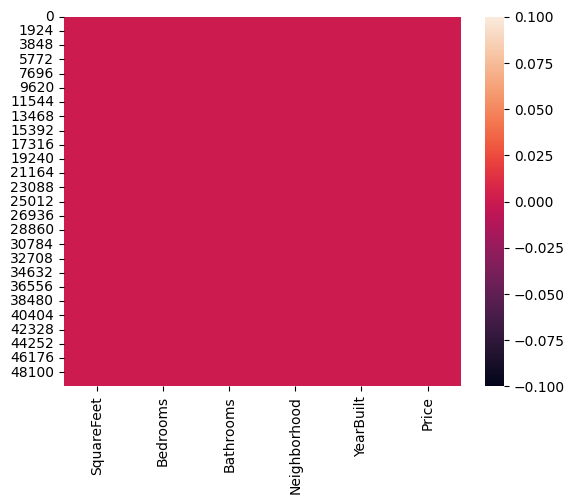

In [6]:
# MENCARI MISSING DATA
sns.heatmap(df.isnull())

In [7]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


<ipython-input-8-468655994425>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

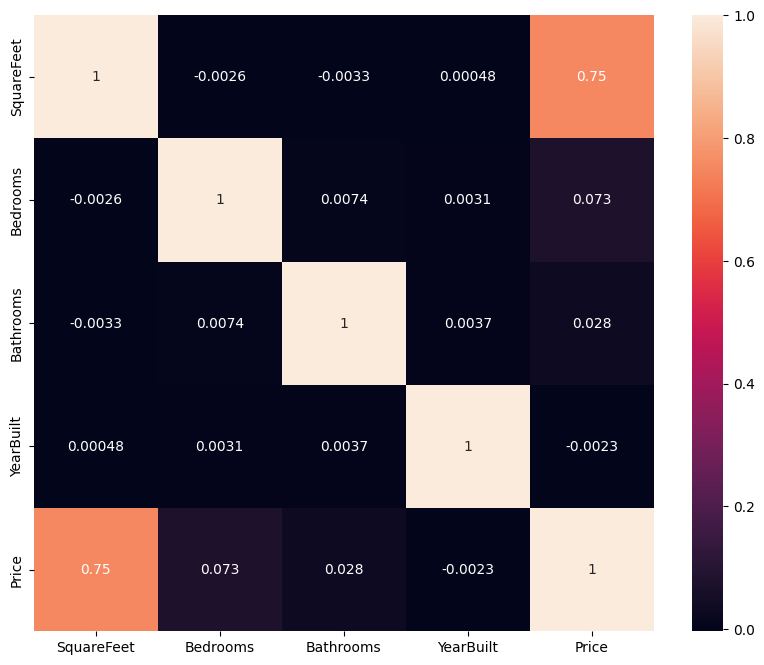

In [8]:
# VISUALISASI DATA
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Korelasinya : 0.7507197856708844


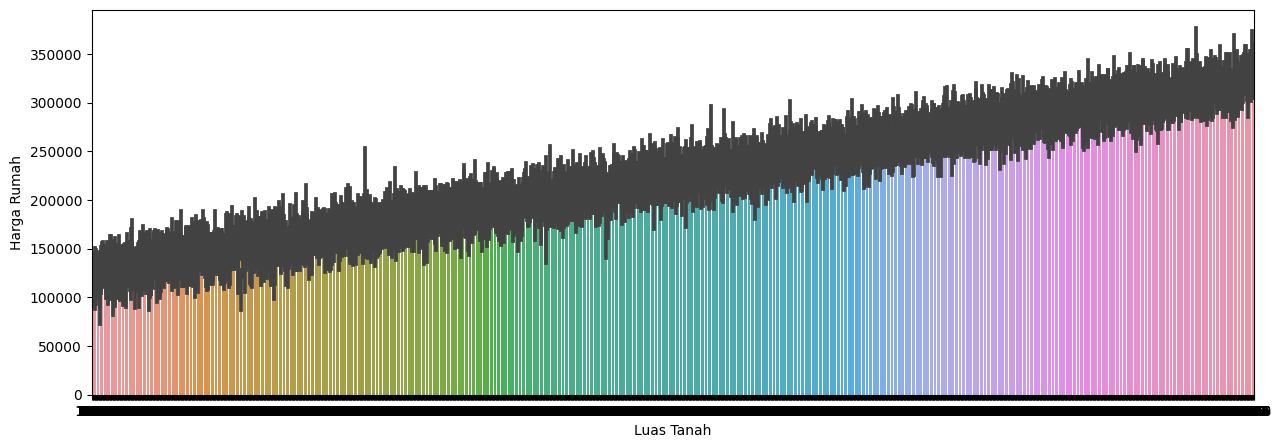

In [15]:
# HUBUNGAN ANTARA BANYAKNYA KAMAR TIDUR DENGAN HARGA RUMAH
corr = df["SquareFeet"].corr(df["Price"])
print("Korelasinya :", corr)
plt.figure(figsize=(15,5))
sns.barplot(x="SquareFeet", y="Price", data=df)
plt.xlabel("Luas Tanah")
plt.ylabel("Harga Rumah")
plt.show()

Korelasinya : -0.002288324254798019


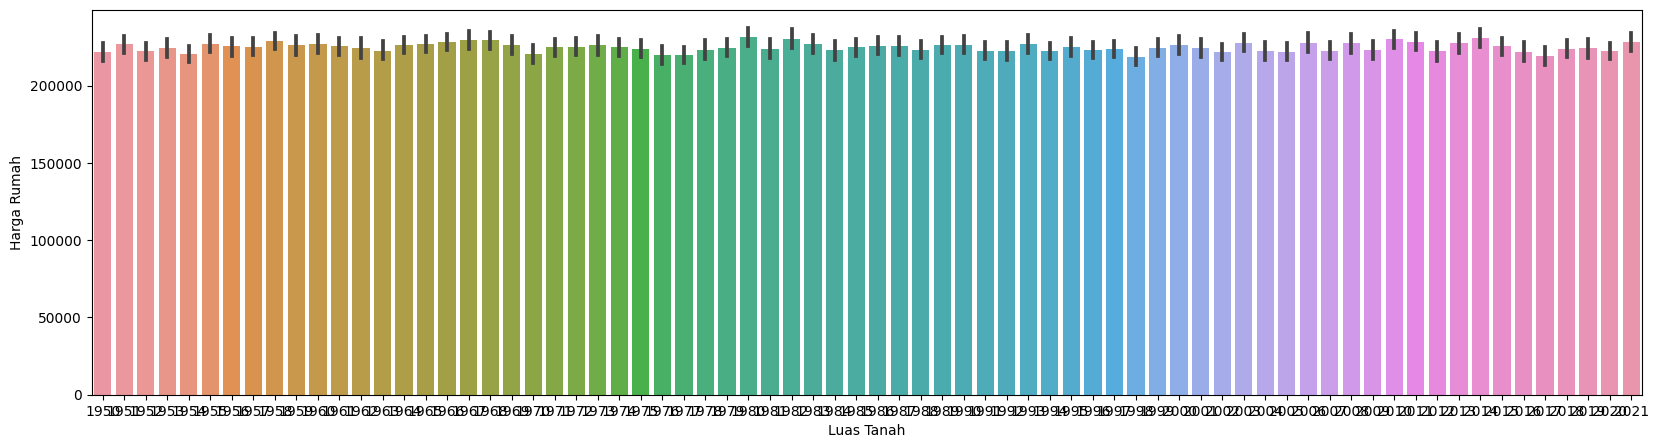

In [17]:
# HUBUNGAN ANTARA BANYAKNYA TAHUN PEMBANGUNAN DENGAN HARGA RUMAH
corr = df["YearBuilt"].corr(df["Price"])
print("Korelasinya :", corr)
plt.figure(figsize=(20,5))
sns.barplot(x="YearBuilt", y="Price", data=df)
plt.xlabel("Luas Tanah")
plt.ylabel("Harga Rumah")
plt.show()

In [19]:
features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']
x = df[features]
y = df['Price']
x.shape, y.shape

((50000, 4), (50000,))

In [20]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(12500,)

In [21]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(X_test)

In [22]:
score = lr.score(X_test, y_test)
print('Akurasi model regresi linier = ', score)

Akurasi model regresi linier =  0.5717646907826892


In [24]:
input_data = np.array([[2126	, 4, 1, 1996]])

prediction = lr.predict(input_data)
print('Estimasi Harga : ', prediction)

Estimasi Harga :  [236367.01285134]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
filename = 'estimasi_harga_rumah.sav'
pickle.dump(lr, open(filename,'wb'))